# Data Cleaning and Preprocessing

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading data set using pandas
data = pd.read_csv("/content/drive/MyDrive/Reviews.csv")

In [ ]:
#first five rows
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Rating counts
data['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [ ]:
data.shape

(568454, 10)

In [ ]:
#Sorting data according to ProductId in ascending order
sorted_data=data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
sorted_data.shape

(568454, 10)

In [ ]:
#Removing the dupicates
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 10)

In [ ]:
#Precentage of removed data
#(final['Id'].size*1.0)/(data['Id'].size*1.0)*100

In [ ]:
#final.head()

Rating treshold is considered as 3

In [ ]:
data_negative_reviews = final[final.Score<3]  

In [ ]:
data_positive_reviews = final[final.Score>3]  

In [ ]:
#data_negative

In [ ]:
data_negative = data_negative_reviews [0:1000]
data_positive = data_positive_reviews [0:1000]

In [ ]:
data_negative = data_negative["Text"]
data_positive = data_positive["Text"]

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
#stop_words = set(stopwords.words('english'))
#stop_words

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm
def cleaning (data):
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
        sentance = re.sub(r"http\S+", "", sentance)
        # https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        #remove spacial character: https://stackoverflow.com/a/5843547/4084039
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    lines = []

    for i in preprocessed_reviews:
        lines.append(i)

    data = ""

    for i in preprocessed_reviews:
        data = ' '. join(lines)
    z = []

    for i in data.split():
        z.append(i)

    data = ' '.join(z)
    return data


In [ ]:
data_p = cleaning(data_positive)

100%|██████████| 1000/1000 [00:00<00:00, 2069.87it/s]


In [ ]:
data_n = cleaning(data_negative)

100%|██████████| 1000/1000 [00:00<00:00, 2200.06it/s]


In [ ]:
#Due to computational power reduced size
data_p = data_p[0:4000]
data_n = data_n[0:4000]

# Positive

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
from tensorflow.keras.utils import to_categorical
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data_p])
#Conver in to vectors
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer_p.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data_p])[0]

vocab_size_p = len(tokenizer.word_index) + 1

sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
sequences = np.array(sequences)

X_p = []
y_p = []

for i in sequences:
    X_p.append(i[0])
    y_p.append(i[1])
    
X_p = np.array(X_p)
y_p = np.array(y_p)

y_p = to_categorical(y_p, num_classes=vocab_size_p)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size_p, 100, input_length=1))
model.add(LSTM(1024, return_sequences=True))
model.add(LSTM(1024))
model.add(Dense(1024, activation="relu"))
model.add(Dense(vocab_size_p, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 100)            38900     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1024)           4608000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 389)               398725    
Total params: 14,487,929
Trainable params: 14,487,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words_p.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
history = model.fit(X_p, y_p, epochs=100, batch_size=64, callbacks=[checkpoint]).history

Epoch 1/100
10/10 [==============================] - 5s 61ms/step - loss: 5.9572 - accuracy: 0.0281

Epoch 00001: loss improved from inf to 5.95720, saving model to next_words_p.h5
Epoch 2/100
10/10 [==============================] - 1s 61ms/step - loss: 5.7438 - accuracy: 0.0281

Epoch 00002: loss improved from 5.95720 to 5.74380, saving model to next_words_p.h5
Epoch 3/100
10/10 [==============================] - 1s 56ms/step - loss: 5.5460 - accuracy: 0.0331

Epoch 00003: loss improved from 5.74380 to 5.54600, saving model to next_words_p.h5
Epoch 4/100
10/10 [==============================] - 1s 57ms/step - loss: 5.4313 - accuracy: 0.0314

Epoch 00004: loss improved from 5.54600 to 5.43128, saving model to next_words_p.h5
Epoch 5/100
10/10 [==============================] - 1s 60ms/step - loss: 5.2855 - accuracy: 0.0347

Epoch 00005: loss improved from 5.43128 to 5.28552, saving model to next_words_p.h5
Epoch 6/100
10/10 [==============================] - 1s 58ms/step - loss: 5.150

10/10 [==============================] - 1s 59ms/step - loss: 2.3291 - accuracy: 0.2793

Epoch 00045: loss improved from 2.38764 to 2.32909, saving model to next_words_p.h5
Epoch 46/100
10/10 [==============================] - 1s 57ms/step - loss: 2.2733 - accuracy: 0.2760

Epoch 00046: loss improved from 2.32909 to 2.27328, saving model to next_words_p.h5
Epoch 47/100
10/10 [==============================] - 1s 57ms/step - loss: 2.2731 - accuracy: 0.2843

Epoch 00047: loss improved from 2.27328 to 2.27313, saving model to next_words_p.h5
Epoch 48/100
10/10 [==============================] - 1s 58ms/step - loss: 2.2333 - accuracy: 0.2760

Epoch 00048: loss improved from 2.27313 to 2.23332, saving model to next_words_p.h5
Epoch 49/100
10/10 [==============================] - 1s 59ms/step - loss: 2.2569 - accuracy: 0.2860

Epoch 00049: loss did not improve from 2.23332
Epoch 50/100
10/10 [==============================] - 1s 62ms/step - loss: 2.2171 - accuracy: 0.2793

Epoch 00050: loss 

10/10 [==============================] - 1s 56ms/step - loss: 1.1429 - accuracy: 0.5421

Epoch 00092: loss did not improve from 1.13885
Epoch 93/100
10/10 [==============================] - 1s 58ms/step - loss: 1.1399 - accuracy: 0.5388

Epoch 00093: loss did not improve from 1.13885
Epoch 94/100
10/10 [==============================] - 1s 59ms/step - loss: 1.1135 - accuracy: 0.5504

Epoch 00094: loss improved from 1.13885 to 1.11347, saving model to next_words_p.h5
Epoch 95/100
10/10 [==============================] - 1s 60ms/step - loss: 1.1237 - accuracy: 0.5471

Epoch 00095: loss did not improve from 1.11347
Epoch 96/100
10/10 [==============================] - 1s 58ms/step - loss: 1.0815 - accuracy: 0.5719

Epoch 00096: loss improved from 1.11347 to 1.08154, saving model to next_words_p.h5
Epoch 97/100
10/10 [==============================] - 1s 59ms/step - loss: 1.0678 - accuracy: 0.5769

Epoch 00097: loss improved from 1.08154 to 1.06776, saving model to next_words_p.h5
Epoch 98

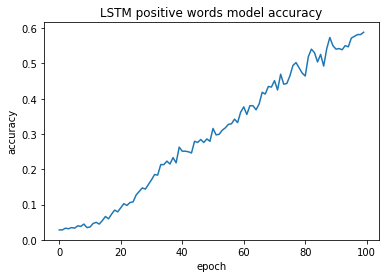

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.title('LSTM positive words model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

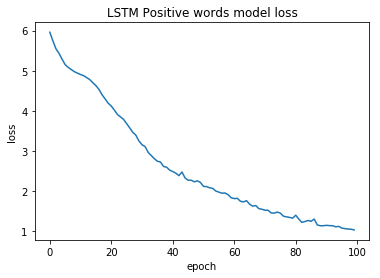

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.title('LSTM Positive words model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Negative

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
from tensorflow.keras.utils import to_categorical
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data_n])
#Convert in to vectors
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer_n.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data_n])[0]

vocab_size_n = len(tokenizer.word_index) + 1
print(vocab_size_n)

sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
sequences = np.array(sequences)

X_n = []
y_n = []

for i in sequences:
    X_n.append(i[0])
    y_n.append(i[1])
    
X_n = np.array(X_n)
y_n = np.array(y_n)

y_n = to_categorical(y_n, num_classes=vocab_size_n)

382


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size_n, 100, input_length=1))
model.add(LSTM(1024, return_sequences=True))
model.add(LSTM(1024))
model.add(Dense(1024, activation="relu"))
model.add(Dense(vocab_size_n, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 100)            38200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 1024)           4608000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 382)               391550    
Total params: 14,480,054
Trainable params: 14,480,054
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words_n.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
history = model.fit(X_n, y_n, epochs=100, batch_size=64, callbacks=[checkpoint]).history

Epoch 1/100
10/10 [==============================] - 6s 68ms/step - loss: 5.9240 - accuracy: 0.0300

Epoch 00001: loss improved from inf to 5.92404, saving model to next_words_n.h5
Epoch 2/100
10/10 [==============================] - 1s 63ms/step - loss: 5.6977 - accuracy: 0.0347

Epoch 00002: loss improved from 5.92404 to 5.69771, saving model to next_words_n.h5
Epoch 3/100
10/10 [==============================] - 1s 61ms/step - loss: 5.5268 - accuracy: 0.0300

Epoch 00003: loss improved from 5.69771 to 5.52684, saving model to next_words_n.h5
Epoch 4/100
10/10 [==============================] - 1s 61ms/step - loss: 5.3855 - accuracy: 0.0379

Epoch 00004: loss improved from 5.52684 to 5.38554, saving model to next_words_n.h5
Epoch 5/100
10/10 [==============================] - 1s 66ms/step - loss: 5.2708 - accuracy: 0.0315

Epoch 00005: loss improved from 5.38554 to 5.27078, saving model to next_words_n.h5
Epoch 6/100
10/10 [==============================] - 1s 63ms/step - loss: 5.122

10/10 [==============================] - 1s 58ms/step - loss: 1.8113 - accuracy: 0.3596

Epoch 00045: loss improved from 1.89262 to 1.81129, saving model to next_words_n.h5
Epoch 46/100
10/10 [==============================] - 1s 59ms/step - loss: 1.8258 - accuracy: 0.3644

Epoch 00046: loss did not improve from 1.81129
Epoch 47/100
10/10 [==============================] - 1s 58ms/step - loss: 1.7185 - accuracy: 0.4022

Epoch 00047: loss improved from 1.81129 to 1.71853, saving model to next_words_n.h5
Epoch 48/100
10/10 [==============================] - 1s 59ms/step - loss: 1.7026 - accuracy: 0.3880

Epoch 00048: loss improved from 1.71853 to 1.70261, saving model to next_words_n.h5
Epoch 49/100
10/10 [==============================] - 1s 57ms/step - loss: 1.6911 - accuracy: 0.3833

Epoch 00049: loss improved from 1.70261 to 1.69109, saving model to next_words_n.h5
Epoch 50/100
10/10 [==============================] - 1s 54ms/step - loss: 1.6261 - accuracy: 0.4227

Epoch 00050: loss 

10/10 [==============================] - 1s 59ms/step - loss: 1.0370 - accuracy: 0.5584

Epoch 00092: loss improved from 1.05701 to 1.03697, saving model to next_words_n.h5
Epoch 93/100
10/10 [==============================] - 1s 58ms/step - loss: 1.0239 - accuracy: 0.5489

Epoch 00093: loss improved from 1.03697 to 1.02391, saving model to next_words_n.h5
Epoch 94/100
10/10 [==============================] - 1s 61ms/step - loss: 1.0511 - accuracy: 0.5442

Epoch 00094: loss did not improve from 1.02391
Epoch 95/100
10/10 [==============================] - 1s 62ms/step - loss: 1.0323 - accuracy: 0.5599

Epoch 00095: loss did not improve from 1.02391
Epoch 96/100
10/10 [==============================] - 1s 58ms/step - loss: 1.0502 - accuracy: 0.5568

Epoch 00096: loss did not improve from 1.02391
Epoch 97/100
10/10 [==============================] - 1s 64ms/step - loss: 1.0089 - accuracy: 0.5552

Epoch 00097: loss improved from 1.02391 to 1.00890, saving model to next_words_n.h5
Epoch 98

Text(0.5, 0, 'epoch')

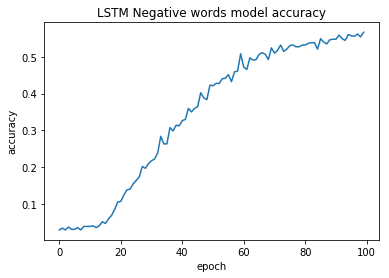

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.title('LSTM Negative words model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

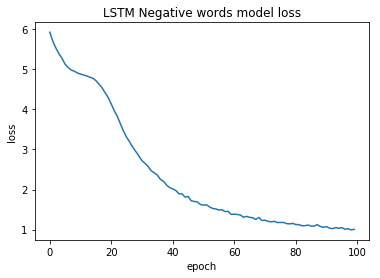

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.title('LSTM Negative words model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# BI LSTM

# Positive

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size_p, 100, input_length=1))
model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(Bidirectional(LSTM(1024)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(vocab_size_p, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 100)            38900     
_________________________________________________________________
bidirectional (Bidirectional (None, 1, 2048)           9216000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 389)               398725    
Total params: 36,925,817
Trainable params: 36,925,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words_p_bi.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
history = model.fit(X_p, y_p, epochs=100, batch_size=64, callbacks=[checkpoint]).history

Epoch 1/100
10/10 [==============================] - 10s 153ms/step - loss: 5.9482 - accuracy: 0.0215

Epoch 00001: loss improved from inf to 5.94821, saving model to next_words_p_bi.h5
Epoch 2/100
10/10 [==============================] - 2s 153ms/step - loss: 5.6982 - accuracy: 0.0314

Epoch 00002: loss improved from 5.94821 to 5.69820, saving model to next_words_p_bi.h5
Epoch 3/100
10/10 [==============================] - 2s 156ms/step - loss: 5.5163 - accuracy: 0.0397

Epoch 00003: loss improved from 5.69820 to 5.51626, saving model to next_words_p_bi.h5
Epoch 4/100
10/10 [==============================] - 2s 151ms/step - loss: 5.3504 - accuracy: 0.0430

Epoch 00004: loss improved from 5.51626 to 5.35043, saving model to next_words_p_bi.h5
Epoch 5/100
10/10 [==============================] - 2s 154ms/step - loss: 5.2263 - accuracy: 0.0397

Epoch 00005: loss improved from 5.35043 to 5.22635, saving model to next_words_p_bi.h5
Epoch 6/100
10/10 [==============================] - 2s 15

10/10 [==============================] - 1s 146ms/step - loss: 1.0273 - accuracy: 0.5901

Epoch 00044: loss improved from 1.03285 to 1.02730, saving model to next_words_p_bi.h5
Epoch 45/100
10/10 [==============================] - 2s 152ms/step - loss: 1.0585 - accuracy: 0.5802

Epoch 00045: loss did not improve from 1.02730
Epoch 46/100
10/10 [==============================] - 2s 154ms/step - loss: 1.0134 - accuracy: 0.5901

Epoch 00046: loss improved from 1.02730 to 1.01343, saving model to next_words_p_bi.h5
Epoch 47/100
10/10 [==============================] - 2s 157ms/step - loss: 1.0098 - accuracy: 0.5851

Epoch 00047: loss improved from 1.01343 to 1.00977, saving model to next_words_p_bi.h5
Epoch 48/100
10/10 [==============================] - 2s 153ms/step - loss: 0.9700 - accuracy: 0.5868

Epoch 00048: loss improved from 1.00977 to 0.96995, saving model to next_words_p_bi.h5
Epoch 49/100
10/10 [==============================] - 2s 153ms/step - loss: 0.9536 - accuracy: 0.6099




Epoch 00093: loss improved from 0.81257 to 0.79407, saving model to next_words_p_bi.h5
Epoch 94/100
10/10 [==============================] - 2s 153ms/step - loss: 0.8029 - accuracy: 0.6182

Epoch 00094: loss did not improve from 0.79407
Epoch 95/100
10/10 [==============================] - 2s 155ms/step - loss: 0.8031 - accuracy: 0.6000

Epoch 00095: loss did not improve from 0.79407
Epoch 96/100
10/10 [==============================] - 2s 151ms/step - loss: 0.8092 - accuracy: 0.6149

Epoch 00096: loss did not improve from 0.79407
Epoch 97/100
10/10 [==============================] - 2s 154ms/step - loss: 0.8078 - accuracy: 0.6083

Epoch 00097: loss did not improve from 0.79407
Epoch 98/100
10/10 [==============================] - 2s 153ms/step - loss: 0.8082 - accuracy: 0.6165

Epoch 00098: loss did not improve from 0.79407
Epoch 99/100
10/10 [==============================] - 2s 152ms/step - loss: 0.9356 - accuracy: 0.5702

Epoch 00099: loss did not improve from 0.79407
Epoch 100/10

Text(0.5, 0, 'epoch')

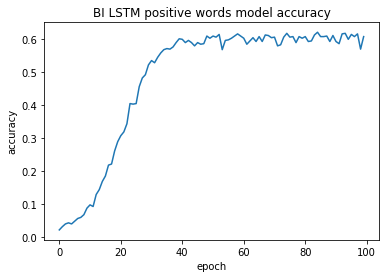

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.title('BI LSTM positive words model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

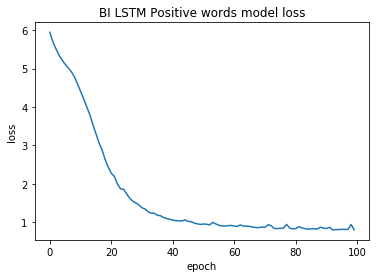

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.title('BI LSTM Positive words model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Negative

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size_n, 100, input_length=1))
model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(Bidirectional(LSTM(1024)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(vocab_size_n, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1, 100)            38200     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 2048)           9216000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 382)               391550    
Total params: 36,917,942
Trainable params: 36,917,942
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words_n_bi.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])
history = model.fit(X_n, y_n, epochs=100, batch_size=64, callbacks=[checkpoint]).history

Epoch 1/100
10/10 [==============================] - 9s 161ms/step - loss: 5.9235 - accuracy: 0.0237

Epoch 00001: loss improved from inf to 5.92350, saving model to next_words_n_bi.h5
Epoch 2/100
10/10 [==============================] - 2s 160ms/step - loss: 5.6784 - accuracy: 0.0300

Epoch 00002: loss improved from 5.92350 to 5.67838, saving model to next_words_n_bi.h5
Epoch 3/100
10/10 [==============================] - 2s 158ms/step - loss: 5.5126 - accuracy: 0.0300

Epoch 00003: loss improved from 5.67838 to 5.51263, saving model to next_words_n_bi.h5
Epoch 4/100
10/10 [==============================] - 2s 153ms/step - loss: 5.3667 - accuracy: 0.0331

Epoch 00004: loss improved from 5.51263 to 5.36671, saving model to next_words_n_bi.h5
Epoch 5/100
10/10 [==============================] - 2s 158ms/step - loss: 5.2154 - accuracy: 0.0205

Epoch 00005: loss improved from 5.36671 to 5.21544, saving model to next_words_n_bi.h5
Epoch 6/100
10/10 [==============================] - 2s 153

Epoch 45/100
10/10 [==============================] - 2s 153ms/step - loss: 1.0740 - accuracy: 0.5678

Epoch 00045: loss improved from 1.10320 to 1.07403, saving model to next_words_n_bi.h5
Epoch 46/100
10/10 [==============================] - 2s 157ms/step - loss: 1.0852 - accuracy: 0.5473

Epoch 00046: loss did not improve from 1.07403
Epoch 47/100
10/10 [==============================] - 2s 160ms/step - loss: 1.0714 - accuracy: 0.5584

Epoch 00047: loss improved from 1.07403 to 1.07141, saving model to next_words_n_bi.h5
Epoch 48/100
10/10 [==============================] - 2s 151ms/step - loss: 1.0489 - accuracy: 0.5584

Epoch 00048: loss improved from 1.07141 to 1.04885, saving model to next_words_n_bi.h5
Epoch 49/100
10/10 [==============================] - 2s 152ms/step - loss: 1.0504 - accuracy: 0.5615

Epoch 00049: loss did not improve from 1.04885
Epoch 50/100
10/10 [==============================] - 2s 155ms/step - loss: 1.0433 - accuracy: 0.5568

Epoch 00050: loss improved 

10/10 [==============================] - 2s 153ms/step - loss: 0.9117 - accuracy: 0.5694

Epoch 00094: loss did not improve from 0.90938
Epoch 95/100
10/10 [==============================] - 2s 159ms/step - loss: 0.9762 - accuracy: 0.5473

Epoch 00095: loss did not improve from 0.90938
Epoch 96/100
10/10 [==============================] - 2s 158ms/step - loss: 0.8968 - accuracy: 0.5710

Epoch 00096: loss improved from 0.90938 to 0.89681, saving model to next_words_n_bi.h5
Epoch 97/100
10/10 [==============================] - 1s 150ms/step - loss: 0.8914 - accuracy: 0.5710

Epoch 00097: loss improved from 0.89681 to 0.89138, saving model to next_words_n_bi.h5
Epoch 98/100
10/10 [==============================] - 2s 154ms/step - loss: 0.8930 - accuracy: 0.5678

Epoch 00098: loss did not improve from 0.89138
Epoch 99/100
10/10 [==============================] - 1s 149ms/step - loss: 0.8974 - accuracy: 0.5615

Epoch 00099: loss did not improve from 0.89138
Epoch 100/100
10/10 [============

Text(0.5, 0, 'epoch')

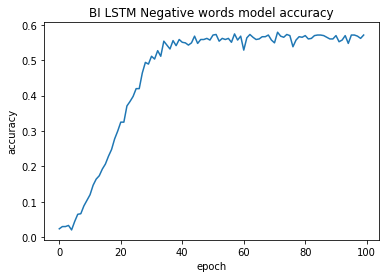

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.title('BI LSTM Negative words model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

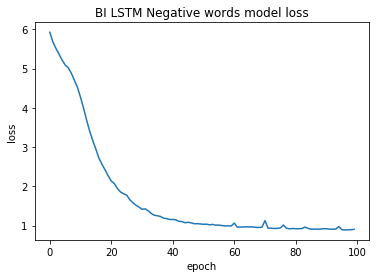

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.title('BI LSTM Negative words model loss')
plt.ylabel('loss')
plt.xlabel('epoch')